In [1]:
library(ggplot2)
library(patchwork)
library(pROC)

options(warn=-1)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [2]:
rm(list = ls())
set.seed(1234)
P = 90
N = 200
p = P/3
pi = 0.05

k=0
while(T){
  k=k+1

  Pre1 = matrix(sample(c(0.2, 0.4), p*p, replace = T) * rbinom(p*p, 1, pi), nrow = p, ncol = p )
  Pre1[lower.tri(Pre1)] = t(Pre1)[lower.tri(Pre1)]
  diag(Pre1) = 1

  Pre2 = 5 * Pre1
  Pre3 = 25 * Pre1
  Pre = Matrix::bdiag(Pre1, Pre2, Pre3)

  vals <- eigen(Pre)$values

  if(is.complex(vals) ) next
  if(all(vals>0.01)) {
    Pre = as.matrix(Pre)
    Sigma = solve(Pre)
    Z = MASS::mvrnorm(N, rep(0, P), Sigma)
    cat('Succeed.')
    break
  }
  if(k>100){
    cat('Failed.')
    break
  } 
}

Succeed.

[1]  0 25

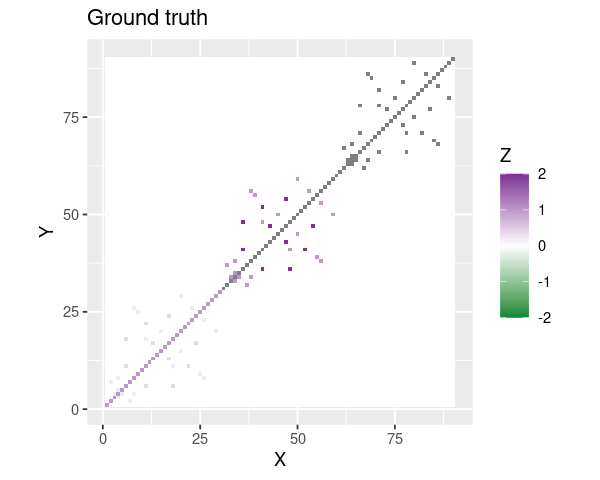

In [3]:
options(repr.plot.width=5, repr.plot.height=4)
X=Y=1:P
df=expand.grid(X=X, Y=Y)
range(Pre)
df$Z=c(Pre)
ggplot(df, aes(X, Y, fill= Z)) + geom_tile(aes(fill = Z)) + ggtitle('Ground truth') + coord_fixed() +
    scale_fill_gradient2(low = "#008837", high = "#7b3294", mid = "white", midpoint = 0, limits=c(-2, 2))

In [4]:
source('../tools.R')
source('../FLAG.R')
Z.c = scale(Z, center = T, scale = F)
Z.s = scale(Z, center = T, scale = T)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




# repeated experiments

In [5]:
rep.times=100

err = NULL
MLE.c.pc.list = c()
CLIME.c.pc.list = c()
OM.c.pc.list = c()
ANT.c.pc.list = c()
BGGM.c.pc.list = c()
GLASSO.c.pc.list = c()
HGL.c.pc.list = c()
DSGL.c.pc.list = c()

MLE.s.pc.list = c()
CLIME.s.pc.list = c()
OM.s.pc.list = c()
ANT.s.pc.list = c()
BGGM.s.pc.list = c()
GLASSO.s.pc.list = c()
HGL.s.pc.list = c()
DSGL.s.pc.list = c()

true.pc = prec2pc(Pre)
Pre.adj=get.adj(Pre)
for(rep in 1:rep.times){
  set.seed(rep)
  Z = MASS::mvrnorm(N, rep(0, P), Sigma)
  Z.c = scale(Z, center = T, scale = F)
  Z.s = scale(Z, center = T, scale = T)

  MLE.c = solve(cov(Z.c))
  CLIME.c = run.clime(Z.c, lambda=0.1)
  OM.c = OurMethod(Z.c)
  ANT.c = FastGGM::FastGGM(Z.c)
  BGGM.c = run.bggm(Z.c)
  GLASSO.c = run.glasso(Z.c)
  HGL.c = run.hglasso(Z.c)
  DSGL.c = SILGGM::SILGGM(Z.c, method='D-S_GL')
  
  MLE.s = solve(cov(Z.s))
  CLIME.s = run.clime(Z.s, lambda=0.1)
  OM.s = OurMethod(Z.s)
  ANT.s = FastGGM::FastGGM(Z.s)
  BGGM.s = run.bggm(Z.s)
  GLASSO.s = run.glasso(Z.s)
  HGL.s = run.hglasso(Z.s)
  DSGL.s = SILGGM::SILGGM(Z.s, method='D-S_GL')
  
  # partial correlation:
  MLE.c.pc = prec2pc(MLE.c)
  CLIME.c.pc = prec2pc(CLIME.c$icov)
  OM.c.pc = prec2pc(OM.c$precision.est)
  ANT.c.pc = prec2pc(ANT.c$precision)
  BGGM.c.pc = prec2pc(BGGM.c$precision)
  GLASSO.c.pc = prec2pc(GLASSO.c$wi)
  HGL.c.pc = prec2pc(HGL.c$Theta)
  DSGL.c.pc = prec2pc(DSGL.c$precision)
  MLE.c.pc.list = c(MLE.c.pc.list, get.tri(MLE.c.pc))
  CLIME.c.pc.list = c(CLIME.c.pc.list, get.tri(CLIME.c.pc))
  OM.c.pc.list = c(OM.c.pc.list, get.tri(OM.c.pc))
  ANT.c.pc.list = c(ANT.c.pc.list, get.tri(ANT.c.pc))
  BGGM.c.pc.list = c(BGGM.c.pc.list, get.tri(BGGM.c.pc))
  GLASSO.c.pc.list = c(GLASSO.c.pc.list, get.tri(GLASSO.c.pc))
  HGL.c.pc.list = c(HGL.c.pc.list, get.tri(HGL.c.pc))
  DSGL.c.pc.list = c(DSGL.c.pc.list, get.tri(DSGL.c.pc))
  
  MLE.s.pc = prec2pc(MLE.s)
  CLIME.s.pc = prec2pc(CLIME.s$icov)
  OM.s.pc = prec2pc(OM.s$precision.est)
  ANT.s.pc = prec2pc(ANT.s$precision)
  BGGM.s.pc = prec2pc(BGGM.s$precision)
  GLASSO.s.pc = prec2pc(GLASSO.s$wi)
  HGL.s.pc = prec2pc(HGL.s$Theta)
  DSGL.s.pc = prec2pc(DSGL.s$precision)
  MLE.s.pc.list = c(MLE.s.pc.list, get.tri(MLE.s.pc))
  CLIME.s.pc.list = c(CLIME.s.pc.list, get.tri(CLIME.s.pc))
  OM.s.pc.list = c(OM.s.pc.list, get.tri(OM.s.pc))
  ANT.s.pc.list = c(ANT.s.pc.list, get.tri(ANT.s.pc))
  BGGM.s.pc.list = c(BGGM.s.pc.list, get.tri(BGGM.s.pc))
  GLASSO.s.pc.list = c(GLASSO.s.pc.list, get.tri(GLASSO.s.pc))
  HGL.s.pc.list = c(HGL.s.pc.list, get.tri(HGL.s.pc))
  DSGL.s.pc.list = c(DSGL.s.pc.list, get.tri(DSGL.s.pc))

  # estimation error
  om.c.tmp = get.fdr(OM.c$precision.pval)
  om.s.tmp = get.fdr(OM.s$precision.pval)
  ant.c.tmp = get.fdr(ANT.c$p_precision)
  ant.s.tmp = get.fdr(ANT.s$p_precision)
  diag(om.c.tmp) = diag(om.s.tmp) = diag(ant.c.tmp) = diag(ant.s.tmp) = 1
  err0 = data.frame(
    cal.err(MLE.c.pc, true.pc), cal.err(MLE.s.pc, true.pc),
    cal.err(CLIME.c.pc, true.pc), cal.err(CLIME.s.pc, true.pc),
    cal.err(OM.c.pc*om.c.tmp, true.pc), cal.err(OM.s.pc*om.s.tmp, true.pc),
    cal.err(ANT.c.pc*ant.c.tmp, true.pc), cal.err(ANT.s.pc*ant.s.tmp, true.pc),
    cal.err(BGGM.c.pc, true.pc), cal.err(BGGM.s.pc, true.pc),
    cal.err(GLASSO.c.pc, true.pc), cal.err(GLASSO.s.pc, true.pc),
    cal.err(HGL.c.pc, true.pc), cal.err(HGL.s.pc, true.pc),
    cal.err(DSGL.c.pc, true.pc),cal.err(DSGL.s.pc, true.pc)
  )
  err = rbind(err, err0)
}

colnames(err) = c("MLE.c","MLE.s",
                  "CLIME.c", "CLIME.s",
                  "FLAG.fdr.c", "FLAG.fdr.s",
                  "ANT.fdr.c", "ANT.fdr.s", 
                  "BGGM.c", "BGGM.s", 
                  "GLASSO.c", "GLASSO.s", 
                  "HGLASSO.c", "HGLASSO.s", 
                  "DS_GL.c", "DS_GL.s")

Allocating memory 
start recovering 
preparing precision and path matrix list 
Done! 
Some columns do not reach the required lambda!
 You may want to increase lambda.min or use a larger nlambda. 


Registered S3 methods overwritten by 'BFpack':
  method               from
  get_estimates.lm     bain
  get_estimates.t_test bain

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



  |======================================================================| 100%Use method '"D-S_GL"'
Use default lambda = sqrt(log(p)/n)
In this case, lambda = 0.149997
Center each column.
Pre-calculate inner product matrixes.
Calculate graphical Lasso.
Allocating memory 
start recovering 
preparing precision and path matrix list 
Done! 
  |======================================================================| 100%Use method '"D-S_GL"'
Use default lambda = sqrt(log(p)/n)
In this case, lambda = 0.149997
Center each column.
Pre-calculate inner product matrixes.
Calculate graphical Lasso.
Allocating memory 
start recovering 
preparing precision and path matrix list 
Done! 
Some columns do not reach the required lambda!
 You may want to increase lambda.min or use a larger nlambda. 
  |======================================================================| 100%Use method '"D-S_GL"'
Use default lambda = sqrt(log(p)/n)
In this case, lambda = 0.149997
Center each column.
Pre-calculate inner p

In [6]:
colMeans(err)

MLE.c      MLE.s    CLIME.c    CLIME.s FLAG.fdr.c FLAG.fdr.s  ANT.fdr.c 
 0.8589096  0.8589096  0.1617998  0.1656909  0.1740857  0.1743568  0.1583857 
 ANT.fdr.s     BGGM.c     BGGM.s   GLASSO.c   GLASSO.s  HGLASSO.c  HGLASSO.s 
 0.1583704  0.8029587  0.7716910  0.2347969  0.1768312  0.2505909  0.2270692 
   DS_GL.c    DS_GL.s 
 0.6278893  0.5743833

In [10]:
sapply(err, function(x)sd(x)/sqrt(length(x)))

MLE.c        MLE.s      CLIME.c      CLIME.s   FLAG.fdr.c   FLAG.fdr.s 
0.0022130736 0.0022130736 0.0006460501 0.0006801243 0.0013923998 0.0013881581 
   ANT.fdr.c    ANT.fdr.s       BGGM.c       BGGM.s     GLASSO.c     GLASSO.s 
0.0010068034 0.0010130102 0.0021039064 0.0019926042 0.0009540824 0.0011077402 
   HGLASSO.c    HGLASSO.s      DS_GL.c      DS_GL.s 
0.0002625538 0.0005795487 0.0007506716 0.0005843174

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1



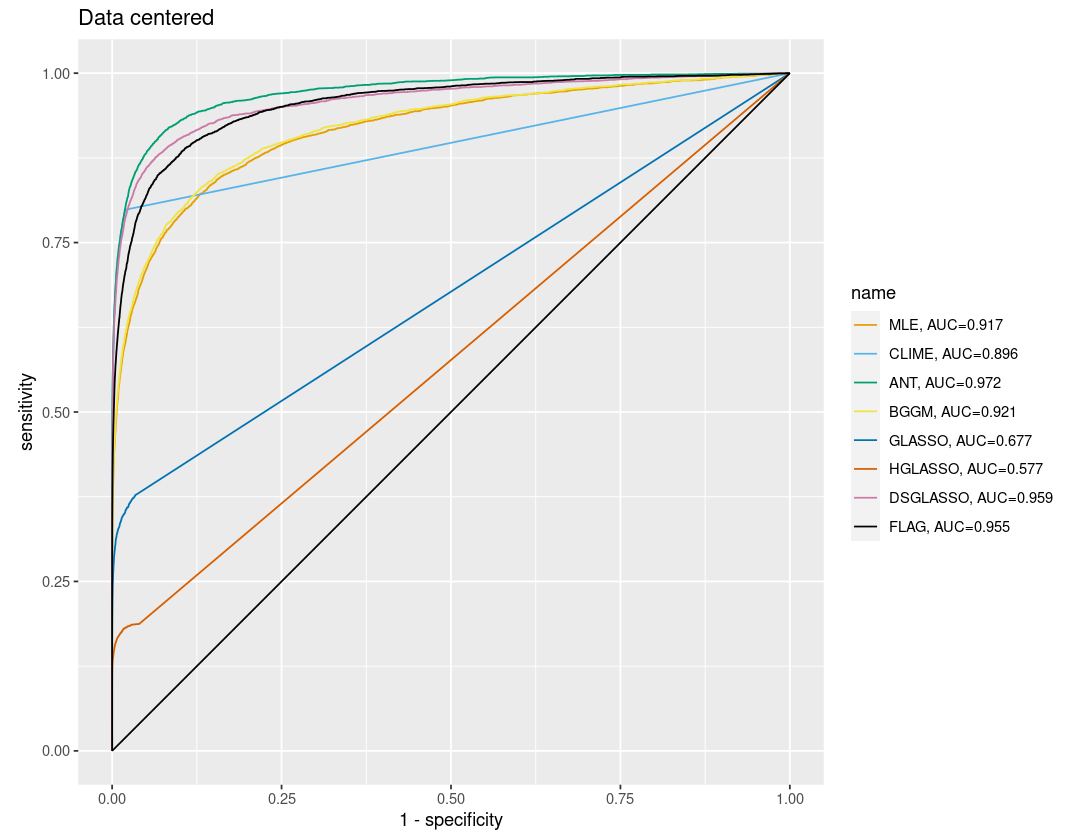

In [8]:
# centered: only consider edge of each pair once (lower triangular)
roc.c = list()
res.true = rep(get.tri(Pre.adj), rep.times)
roc.c$MLE=roc(response=res.true, predictor=abs(MLE.c.pc.list), direction = "<")
roc.c$CLIME=roc(response=res.true, predictor=abs(CLIME.c.pc.list), direction = "<")
roc.c$ANT=roc(response=res.true, predictor=abs(ANT.c.pc.list), direction = "<")
roc.c$BGGM=roc(response=res.true, predictor=abs(BGGM.c.pc.list), direction = "<")
roc.c$GLASSO=roc(response=res.true, predictor=abs(GLASSO.c.pc.list), direction = "<")
roc.c$HGLASSO=roc(response=res.true, predictor=abs(HGL.c.pc.list), direction = "<")
roc.c$DSGLASSO=roc(response=res.true, predictor=abs(DSGL.c.pc.list), direction = "<")
roc.c$FLAG=roc(response=res.true, predictor=abs(OM.c.pc.list), direction = "<")
options(repr.plot.width=9, repr.plot.height=7)
ggroc(roc.c, legacy.axes=TRUE)+ annotate(geom='segment', x=0, y=0, xend=1, yend=1) +
  scale_colour_manual(labels=get.roc.labels(roc.c,digits=3),values = c("#E69F00","#56B4E9","#009E73","#F0E442","#0072B2","#D55E00","#CC79A7","#000000"))+
  ggtitle('Data centered')+ coord_fixed()

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1

Setting levels: control = 0, case = 1



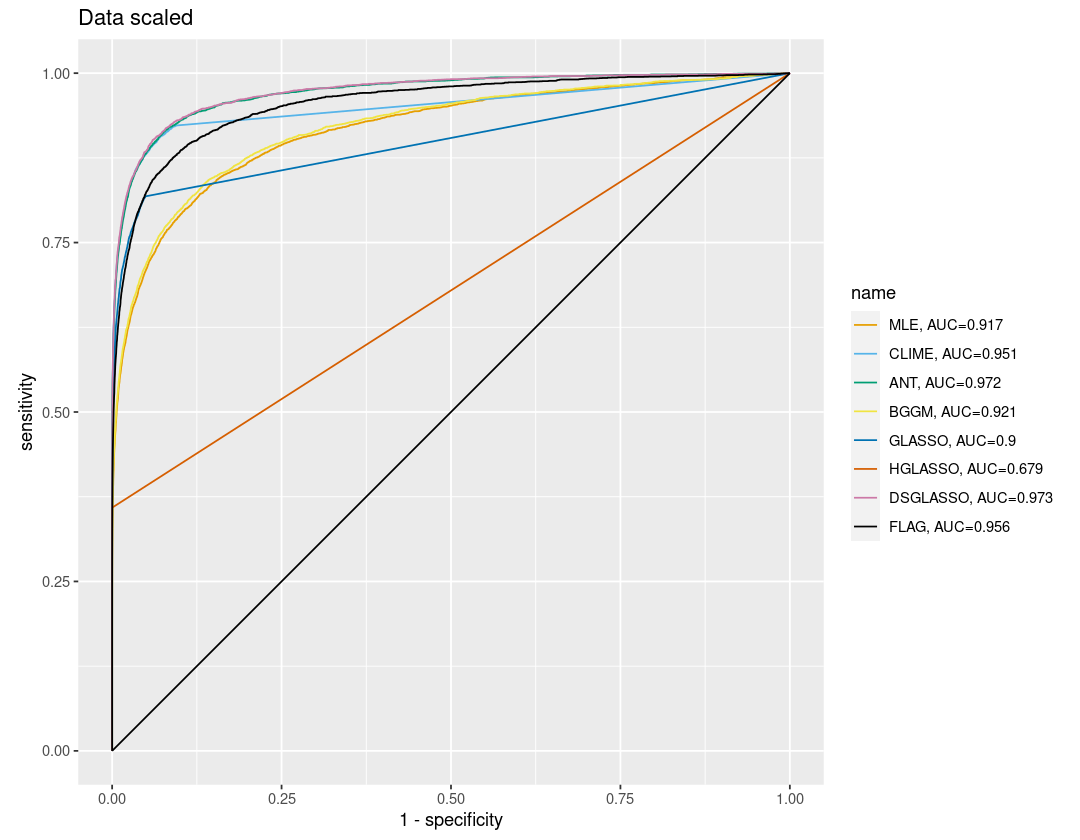

In [9]:
# scaled: only consider edge of each pair once (lower triangular)
roc.s = list()
res.true = rep(get.tri(Pre.adj), rep.times)
roc.s$MLE=roc(response=res.true, predictor=abs(MLE.s.pc.list), direction = "<")
roc.s$CLIME=roc(response=res.true, predictor=abs(CLIME.s.pc.list), direction = "<")
roc.s$ANT=roc(response=res.true, predictor=abs(ANT.s.pc.list), direction = "<")
roc.s$BGGM=roc(response=res.true, predictor=abs(BGGM.s.pc.list), direction = "<")
roc.s$GLASSO=roc(response=res.true, predictor=abs(GLASSO.s.pc.list), direction = "<")
roc.s$HGLASSO=roc(response=res.true, predictor=abs(HGL.s.pc.list), direction = "<")
roc.s$DSGLASSO=roc(response=res.true, predictor=abs(DSGL.s.pc.list), direction = "<")
roc.s$FLAG=roc(response=res.true, predictor=abs(OM.s.pc.list), direction = "<")
options(repr.plot.width=9, repr.plot.height=7)
ggroc(roc.s, legacy.axes=TRUE)+ annotate(geom='segment', x=0, y=0, xend=1, yend=1) +
  scale_colour_manual(labels=get.roc.labels(roc.s,digits=3),values = c("#E69F00","#56B4E9","#009E73","#F0E442","#0072B2","#D55E00","#CC79A7","#000000"))+
  ggtitle('Data scaled')+ coord_fixed()

Conclusion: The results from the FLAG method when the truth of precision matrix is extremely sparse, is comparable with the other methods with sparsity assumptions on the precision matrix.